# Implement a simple deep neural network (DNN) for solving the polynomial 𝒚 = 𝟓𝒙𝟑 − 𝟖𝒙𝟐 − 𝟕𝒙 + 𝟏 with the following specifications

## a) Use three hidden-layers of sizes 32, 64, and 128 and display the generated DNN with the required number of parameters

### Import Necessary Files

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

### Buid the Model

In [ ]:
inputs = Input((1,), name='Input_Layer')
x=Dense(32, activation='relu')(inputs)
x=Dense(64, activation='relu')(x)
x=Dense(128, activation='relu')(x)
outputs = Dense(1, name='Output_Layer', activation='linear')(x)
model = Model(inputs, outputs, name='DNN')
model.summary()

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 Output_Layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## b) Generate training samples within the range of -20 to +20. Use the appropriate method for normalizing the training data in the range of -1 to +1

### Generate X and y

In [ ]:
X = np.linspace(-20, 20, 10000)
# y = (5*np.power(X, 3)) - (8*np.power(X, 2)) - (7*X) + 1
y = (5*(X**3)) - (8*(X**2)) - (7*X) + 1


### print x and  y

In [ ]:
print("Length of x: ", len(X))
print("Last 5 elements of x: ", X[-5:])
print("Length of y: ", len(y))
print("Last 5 elements of y: ", y[-5:])

Length of x:  10000
Last 5 elements of x:  [19.9839984 19.9879988 19.9919992 19.9959996 20.       ]
Length of y:  10000
Last 5 elements of y:  [36570.29766876 36592.95923949 36615.63015032 36638.31040319
 36661.        ]


### Plot The Value of x

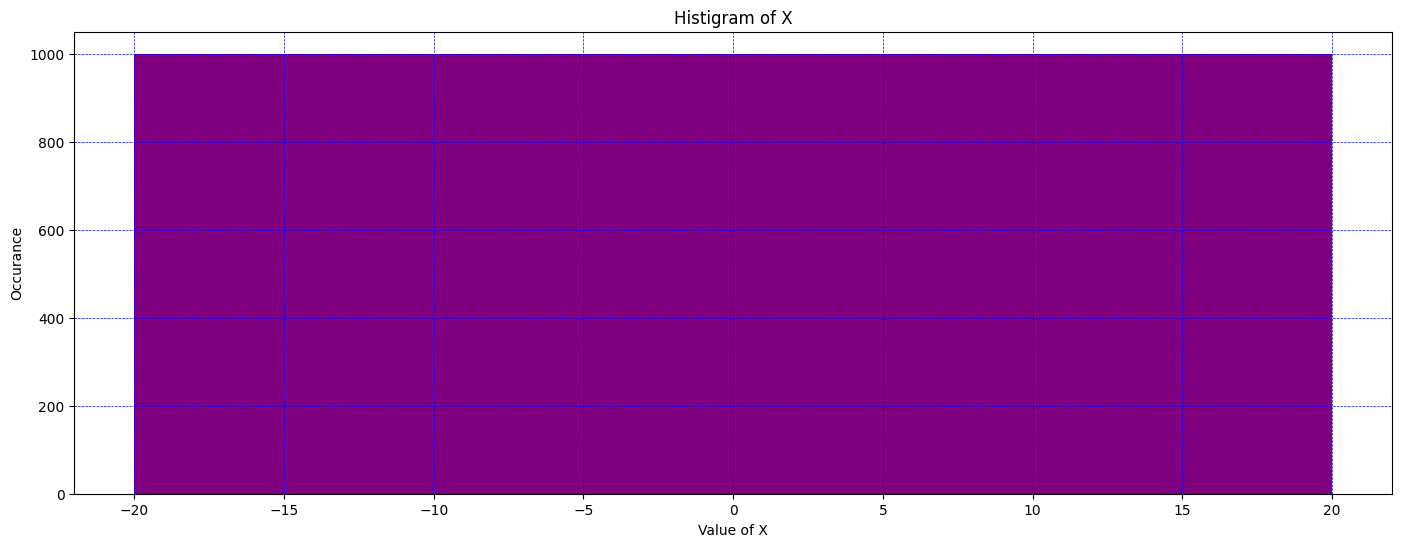

In [ ]:
plt.figure(figsize=(17,6))
plt.hist(X, color='purple')
plt.grid(color='blue', linestyle='--', linewidth=0.5)
plt.xlabel('Value of X')
plt.ylabel('Occurance')
plt.title('Histigram of X')
plt.show()

### Plot The Value of y

Text(0.5, 1.0, 'Histigram of y')

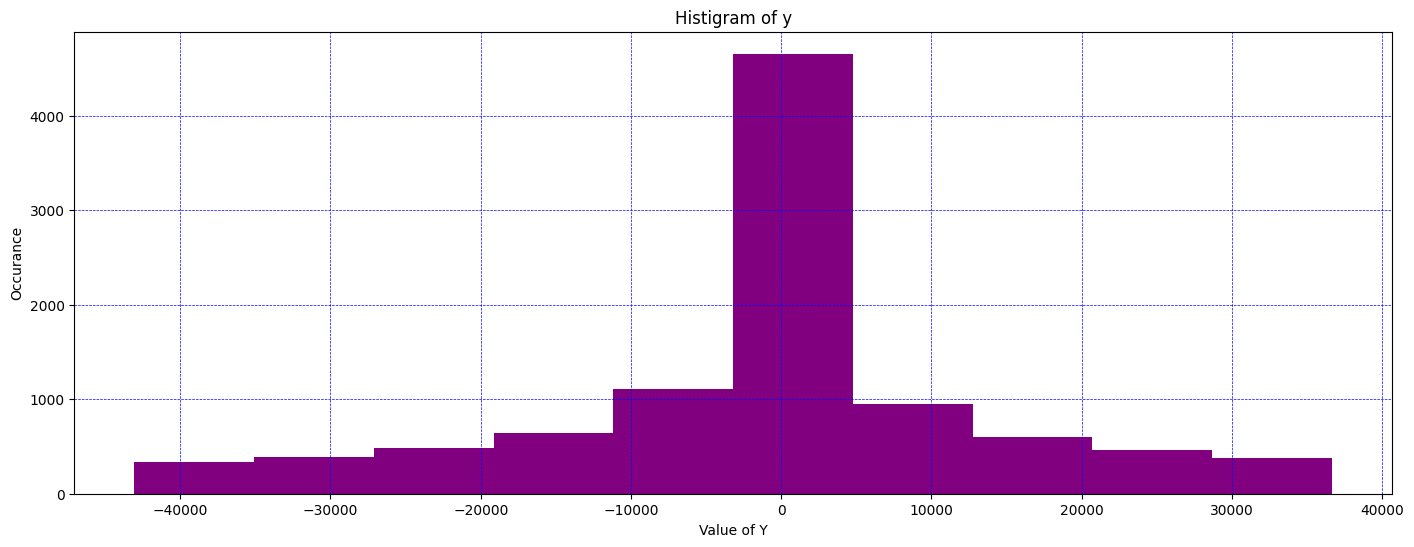

In [ ]:
plt.figure(figsize=(17,6))
plt.hist(y, color='purple')
plt.grid(color='blue', linestyle='--', linewidth=0.5)
plt.xlabel('Value of Y')
plt.ylabel('Occurance')
plt.title('Histigram of y')

### Normalize X and Y

In [ ]:
X_max= X.max()
X_min = X.min()
X = 2*((X-X_min)/ (X_max-X_min)) - 1
y_max= y.max()
y_min= y.min()
y = 2*((y-y_min) / (y_max-y_min)) - 1

### Train Test Split.Divide 90% data for trainning, 5% data for testing and 5% for validation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.1, random_state=42)
#Test x and y _size
print(f'X train Size: {len(X_train)}')
print('Range of X train {} to {}'.format(X_train.max(), X_train.min()))
print(f'X test_val Size: {len(X_test_val)}')
print(f'y train Size: {len(y_train)}')
print(f'y test_val Size: {len(y_test_val)}')

X train Size: 9000
Range of X train 1.0 to -0.9997999799979999
X test_val Size: 1000
y train Size: 9000
y test_val Size: 1000


### Plot The Value of X_train and y_train after Normalization

Text(0.5, 1.0, 'Histigram of X_train After Normalization')

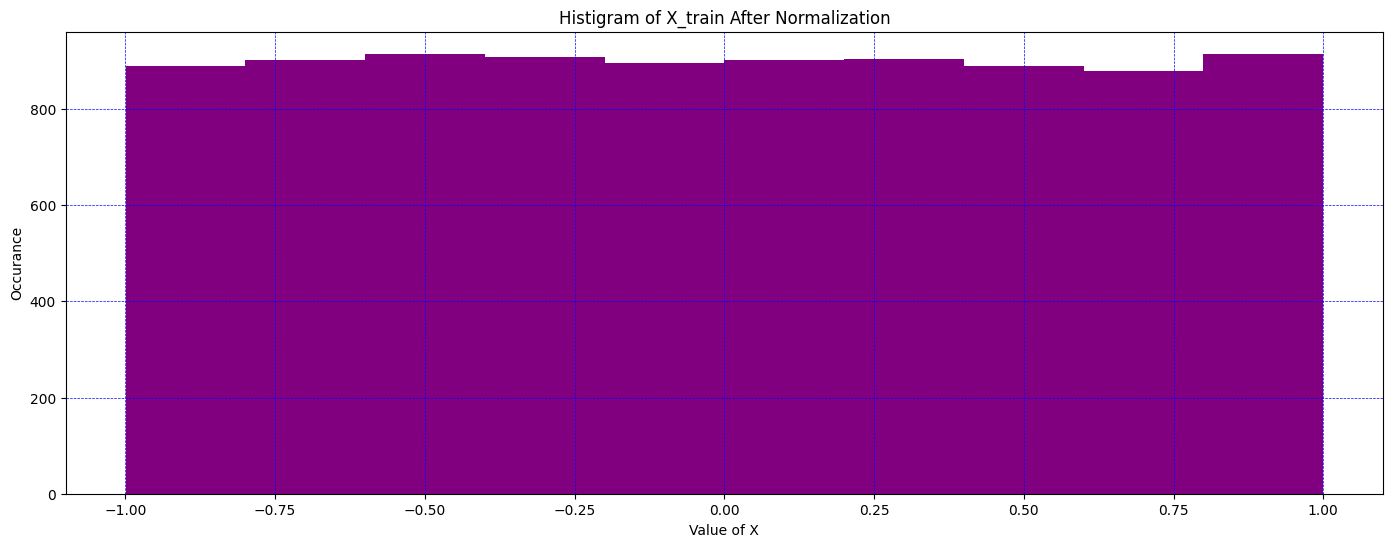

In [ ]:
plt.figure(figsize=(17,6))
plt.hist(X_train, color='purple')
plt.grid(color='blue', linestyle='--', linewidth=0.5)
plt.xlabel('Value of X')
plt.ylabel('Occurance')
plt.title('Histigram of X_train After Normalization')

Text(0.5, 1.0, 'Histigram of y_train After Normalization')

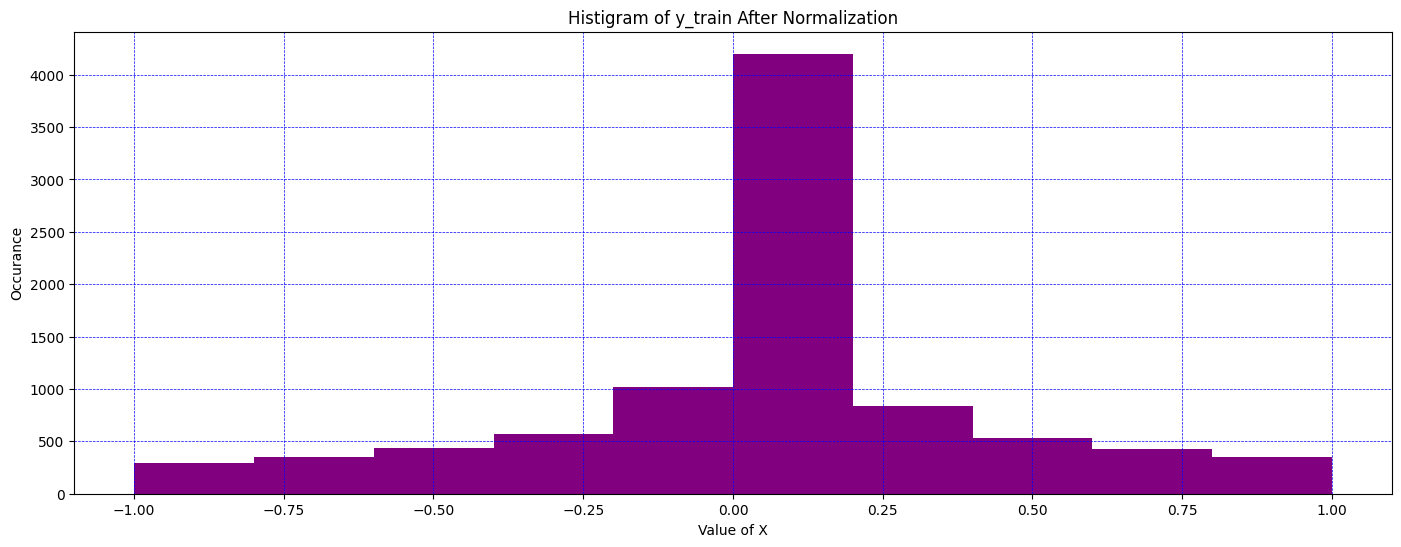

In [ ]:
plt.figure(figsize=(17,6))
plt.hist(y_train, color='purple')
plt.grid(color='blue', linestyle='--', linewidth=0.5)
plt.xlabel('Value of X')
plt.ylabel('Occurance')
plt.title('Histigram of y_train After Normalization')

## c) Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with and appropriate number of epochs.

### Split Data intro test and val

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)
print('Length of X test ' ,len(X_test))
print('Length of X Val ' ,len(X_val))
print('Length of y test ' ,len(y_test))
print('Length of y val ',len(y_val))

Length of X test  500
Length of X Val  500
Length of y test  500
Length of y val  500


### Model Compile and Train

In [ ]:
model.compile(loss='mse', metrics=[tf.keras.metrics.R2Score()])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
282/282 [==============================] - 2s 3ms/step - loss: 0.0087 - r2_score: 0.9385 - val_loss: 0.0023 - val_r2_score: 0.9841
Epoch 2/10
282/282 [==============================] - 1s 2ms/step - loss: 8.3184e-04 - r2_score: 0.9941 - val_loss: 3.1498e-04 - val_r2_score: 0.9978
Epoch 3/10
282/282 [==============================] - 1s 2ms/step - loss: 5.8045e-04 - r2_score: 0.9959 - val_loss: 1.3788e-04 - val_r2_score: 0.9990
Epoch 4/10
282/282 [==============================] - 1s 2ms/step - loss: 4.9034e-04 - r2_score: 0.9966 - val_loss: 1.1335e-04 - val_r2_score: 0.9992
Epoch 5/10
282/282 [==============================] - 1s 2ms/step - loss: 4.0831e-04 - r2_score: 0.9971 - val_loss: 0.0018 - val_r2_score: 0.9876
Epoch 6/10
282/282 [==============================] - 1s 2ms/step - loss: 3.5193e-04 - r2_score: 0.9975 - val_loss: 9.0442e-04 - val_r2_score: 0.9936
Epoch 7/10
282/282 [==============================] - 1s 4ms/step - loss: 3.2051e-04 - r2_score: 0.9977 - val_lo

## d) Display the training accuracy vs validation accuracy and training error vs validation error curves.

In [ ]:
#Y Predict
y_pred = model.predict(X_test)

16/16 [==============================] - 0s 2ms/step


In [ ]:
#Denormalize
X_test = ((X_test + 1) * (X_max - X_min) / 2) + X_min
y_test = ((y_test + 1) * (y_max - y_min) / 2) + y_min
y_pred = ((y_pred + 1) * (y_max - y_min) / 2) + y_min

In [ ]:
# Print available keys in performance_dict
performance_dict = history.history
print(performance_dict.keys())


dict_keys(['loss', 'r2_score', 'val_loss', 'val_r2_score'])


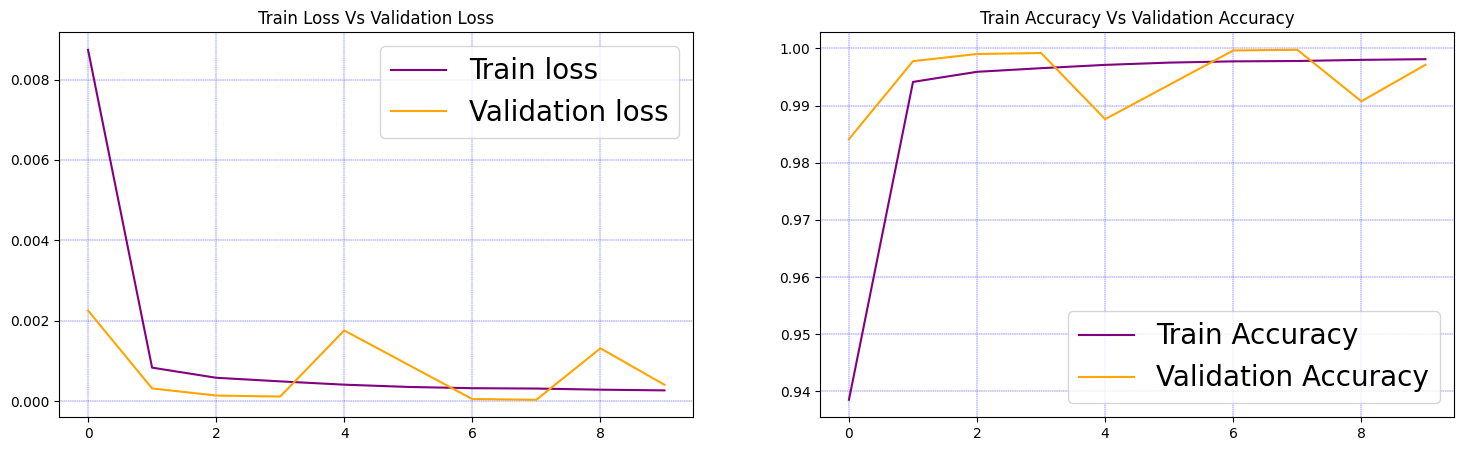

In [ ]:
performance_dict = history.history
plt.figure(figsize = (18, 5))
plt.subplot(1,2,1)
plt.plot(performance_dict['loss'], color='purple', label='Train loss')
plt.plot(performance_dict['val_loss'], color='orange', label = 'Validation loss')
plt.legend(loc='upper right', fontsize=20)
plt.grid(color='blue', linewidth=0.3, linestyle='--')
plt.title('Train Loss Vs Validation Loss')

plt.subplot(1,2,2)
plt.plot(performance_dict['r2_score'], color='purple', label='Train Accuracy')
plt.plot(performance_dict['val_r2_score'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right', fontsize=20)
plt.grid(color='blue', linewidth=0.3, linestyle='--')
plt.title('Train Accuracy Vs Validation Accuracy')

plt.show()

## e) After training, use the test data for prediction and display the prediction accuracy vs true levels of the test data.

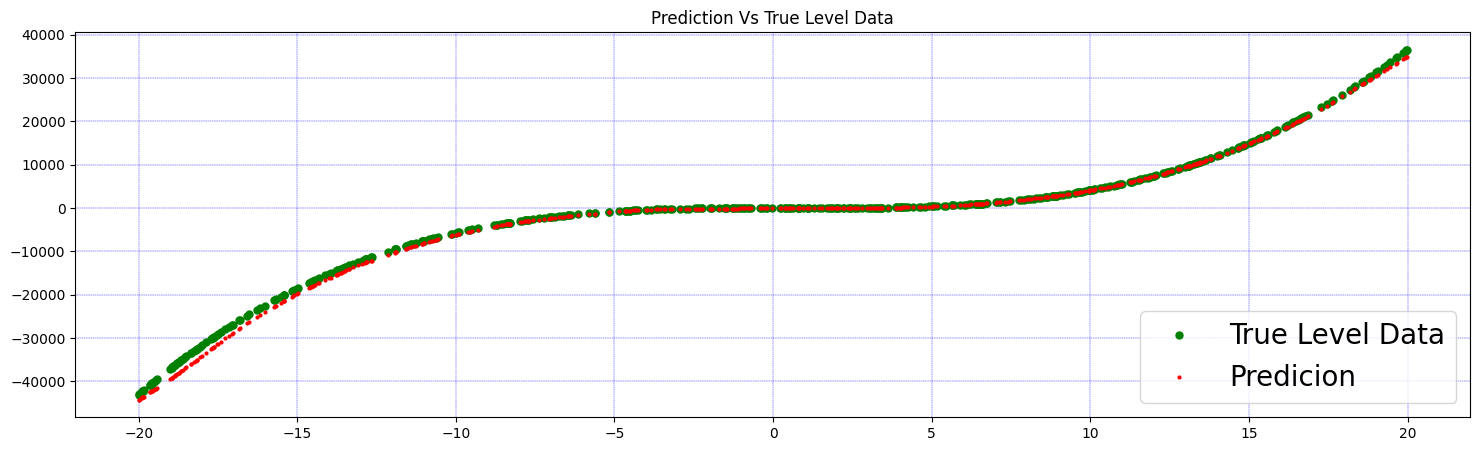

In [ ]:
performance_dict = history.history
plt.figure(figsize = (18, 5))
plt.plot(X_test, y_test, '.', color='green',ms=10, label='True Level Data')
plt.plot(X_test, y_pred, '.', color='red', ms=4, label='Predicion')
plt.title ('Prediction Vs True Level Data')
plt.grid(color='blue', linewidth=0.3, linestyle='--')
plt.legend(loc='lower right', fontsize=20)

plt.show()

In [ ]:
y_pred